# **Task--02**

**Perform data cleaning and exploratory data analysis (EDA) on a dataset of your choice, such as the Titanic dataset from Kaggle. Explore the relationships between variables and identify patterns and trends in the data.**

## **Importing essential libriaries**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

## **Loading Data to Notebook**

In [5]:
titanic = pd.read_csv(r"C:\Users\HP\Documents\Data science\titanic.csv")
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


**Variable	Definition	Key**
survival	Survival	0 = No, 1 = Yes
 pclass	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
 sex	Sex	
Age	Age in years	
sibsp	# of siblings / spouses aboard the Titanic	
parch	# of parents / children aboard the Titanic	
ticket	Ticket number	
fare	Passenger fare	
cabin	Cabin number	
embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

## **Understanding the Data--Titanic**

In [8]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## **Dropping unnecessary Columns**

In [13]:
titanic.drop(['Cabin', 'Ticket'], axis = 1, inplace = True)

In [17]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C


## **Dealing with missing values**

In [20]:
titanic['Embarked'] = titanic['Embarked'].replace({np.nan: 'S'})

In [22]:
titanic['Embarked'].isna().sum()

0

In [24]:
titanic['Age'].isna().sum()

177

<Axes: xlabel='Pclass', ylabel='Age'>

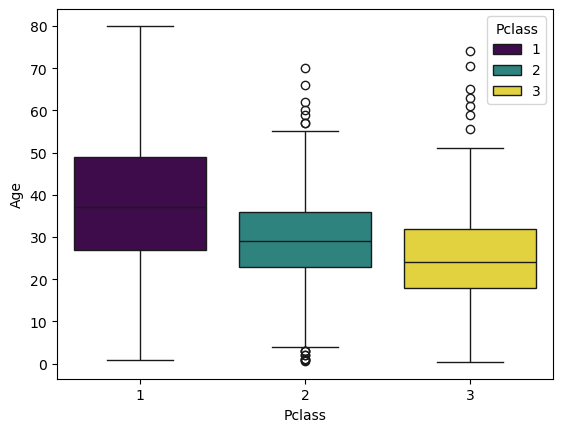

In [26]:
sns.boxplot( y = titanic['Age'].dropna(), x = titanic['Pclass'], palette = 'viridis', hue = titanic['Pclass'])

In [28]:
# Define age replacements based on Pclass
age_replacement = {1: 38, 2: 29, 3: 27}

# Replace NaN values in 'Age' using 'Pclass'
titanic['Age'] = titanic.apply(
    lambda row: age_replacement[row['Pclass']] 
    if np.isnan(row['Age']) 
    else row['Age'],
    axis=1
)

In [30]:
titanic['Age'].isna().sum()

0

## **Visualizations**

<Axes: xlabel='Pclass', ylabel='count'>

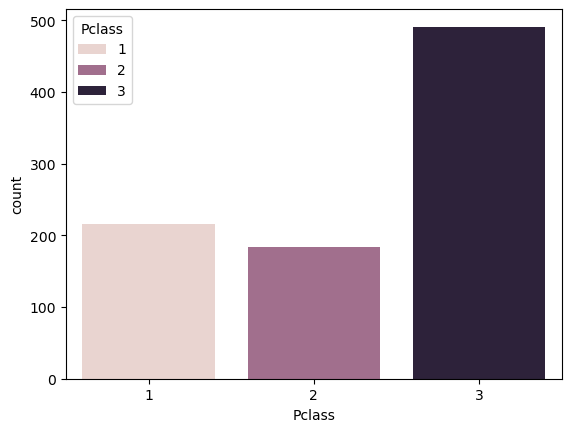

In [33]:
sns.countplot(x = titanic['Pclass'], hue = titanic['Pclass'])

<Axes: xlabel='Survived', ylabel='count'>

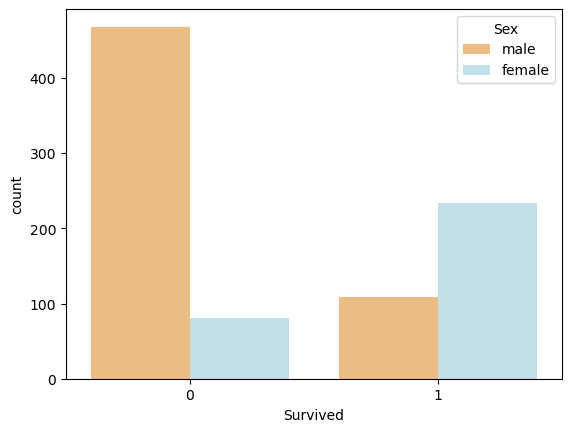

In [35]:
sns.countplot(x = titanic['Survived'], hue = titanic['Sex'], palette = 'RdYlBu')

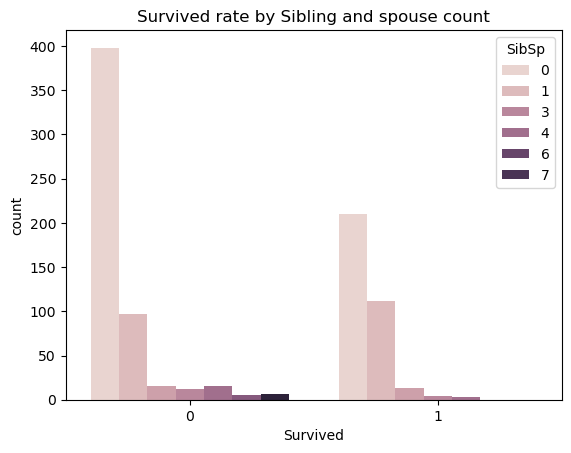

In [37]:
sns.countplot(x = titanic['Survived'], hue = titanic['SibSp'])
plt.title('Survived rate by Sibling and spouse count')
plt.show()

<Axes: xlabel='Survived', ylabel='count'>

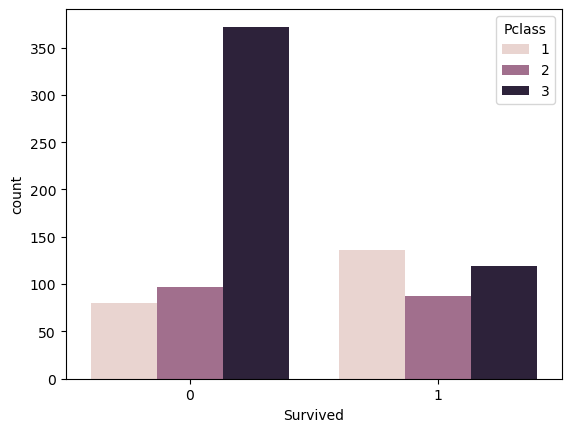

In [67]:
sns.countplot(x = titanic['Survived'], hue = titanic['Pclass'])

In [69]:
maxAge = titanic['Age'].max()
minAge = titanic['Age'].min()
print(minAge, maxAge)

0.42 80.0


In [71]:
bins = [0, 5, 12, 19, 35, 60, 100]
labels = ['Toddlers', 'Child', 'Teen', 'Young Adult', 'Adult', 'Old']
titanic['age_category'] = pd.cut(titanic['Age'], bins = bins, labels = labels)
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,age_category
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Young Adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Young Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Young Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Young Adult


<Axes: xlabel='Survived', ylabel='count'>

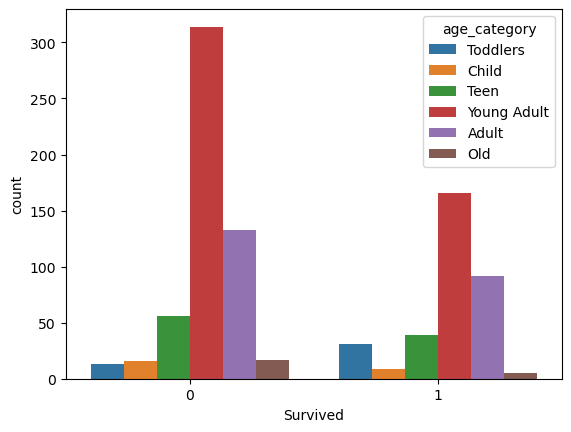

In [73]:
sns.countplot(x = titanic['Survived'], hue = titanic['age_category'])

In [75]:
numeric_data = titanic.select_dtypes(include = [np.number])
numeric_data

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000
887,888,1,1,19.0,0,0,30.0000
888,889,0,3,27.0,1,2,23.4500
889,890,1,1,26.0,0,0,30.0000


In [77]:
numeric_data.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.034494,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.056820,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.387110,0.083081,0.018443,-0.549500
Age,0.034494,-0.056820,-0.387110,1.000000,-0.241023,-0.180311,0.114102
SibSp,-0.057527,-0.035322,0.083081,-0.241023,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.180311,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.114102,0.159651,0.216225,1.000000


## **Hypothesis Testing**

#### **1. Relationship Between Age and Fare**


H_0: There is no correlation between age and fare.

𝐻_𝑎: There is a correlation between age and fare.

<Axes: xlabel='Age', ylabel='Count'>

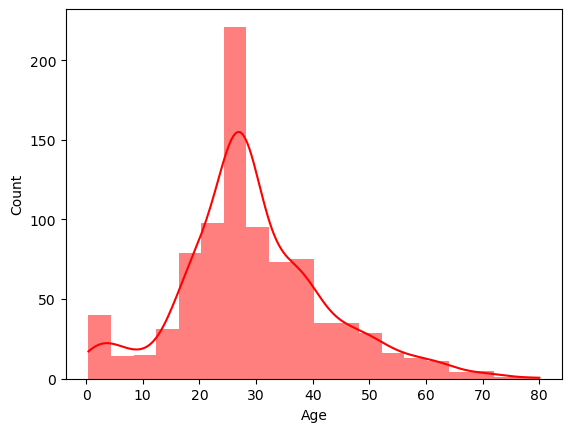

In [98]:
sns.histplot(x = titanic['Age'], bins = 20, kde = True, edgecolor = None, color = 'red')

<Axes: xlabel='Fare', ylabel='Count'>

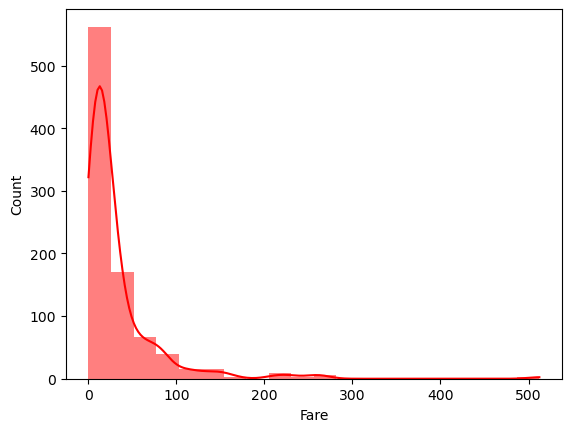

In [110]:
sns.histplot(x = titanic['Fare'], bins = 20, kde = True, edgecolor = None, color = 'red')

<Axes: xlabel='Age', ylabel='Fare'>

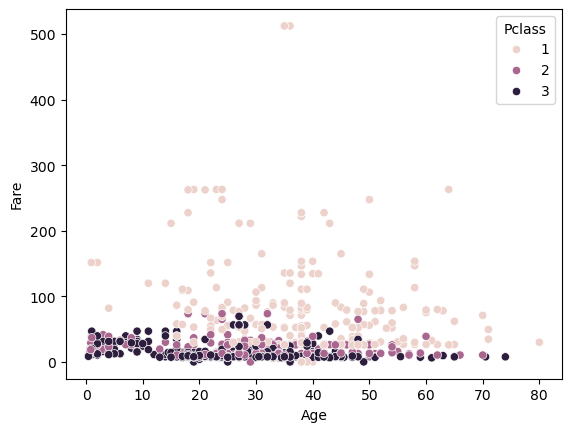

In [86]:
sns.scatterplot(data = titanic, x = 'Age', y = 'Fare', hue = 'Pclass')

In [88]:
correlation, p_value = stats.pearsonr(titanic['Age'], titanic['Fare'])
print(f'Correlation coefficient:{correlation}')
print(f'P_value:{p_value}')

Correlation coefficient:0.11410231186913505
P_value:0.000644219925531924


**alpha = 0.05**

In [91]:
if p_value <= 0.05:
    print("Reject the null hypothesis. Significant correlation.")
else:
    print("Fail to reject the null hypothesis. No significant correlation.")    
    

Reject the null hypothesis. Significant correlation.


##### **There is a statistically significant but weak linear relationship.**

#### **2.Test for Class and Survival Association**
**Hypothesis:**

**𝐻_0: Passenger class and survival are independent.**

**𝐻_𝑎: Passenger class and survival are not independent.**

In [123]:
from scipy.stats import chi2_contingency

In [127]:
contingency_table = pd.crosstab(titanic['Pclass'], titanic['Survived'])
contingency_table

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


In [129]:
chi2, p, dof, expected = chi2_contingency(contingency_table)

In [133]:
print("Expected Frequencies:")
print(expected)

Expected Frequencies:
[[133.09090909  82.90909091]
 [113.37373737  70.62626263]
 [302.53535354 188.46464646]]


**No frequency is less than 5 therefore chi-square can be used for analysis**

In [136]:
if p < 0.05:
    print('Null hypothesis is rejected as their is prove of association')
else:
    print('Null hypothesis is failed to reject')

Null hypothesis is rejected as their is prove of association


##### **There is some association between the ship class and survival**

####  **3. Proportion Comparison Across Groups: survival rates across embarkation ports**


Hypothesis:  
H_0: Survival rates are the same across embarkment ports  
H_a: Survival rates are not the same across embarkment ports

In [149]:
contingency_table2 = pd.crosstab(titanic['Embarked'], titanic['Survived'])
contingency_table2

Survived,0,1
Embarked,,
C,75,93
Q,47,30
S,427,219


In [151]:
chi2, p2, dof, expected = chi2_contingency(contingency_table2)

In [153]:
print("Expected Frequencies:")
print(expected)

Expected Frequencies:
[[103.51515152  64.48484848]
 [ 47.44444444  29.55555556]
 [398.04040404 247.95959596]]


**No frequency is less than 5 therefore chi-square can be used for analysis**

In [158]:
if p2 < 0.05:
    print('Null hypothesis is rejected as their is prove of association')
else:
    print('Null hypothesis is failed to reject')

Null hypothesis is rejected as their is prove of association


##### **There is some association between the Embarked and survival**